# 3.10.1 Computing Fourier Transforms
In this section of computer exercises, let us consider two examples illustrating the use of DFT in finding the Fourier transform. We shall use Python to find DFT by the FFT algorithm. In the first example, the signal $ g(t) = e^{−2t}u(t) $ starts at $ t = 0 $. In the second example, we use $ g(t) = \Pi(t/\tau)$, which starts at $ t =−0.5\tau$.

## COMPUTER EXAMPLE C3.1
Use DFT (implemented by the FFT algorithm) to compute the Fourier transform of $ e^{−2t}u(t) $. Plot the resulting Fourier spectra.

<span style="color:red"> <b>*Note: See Text. *</b></span>

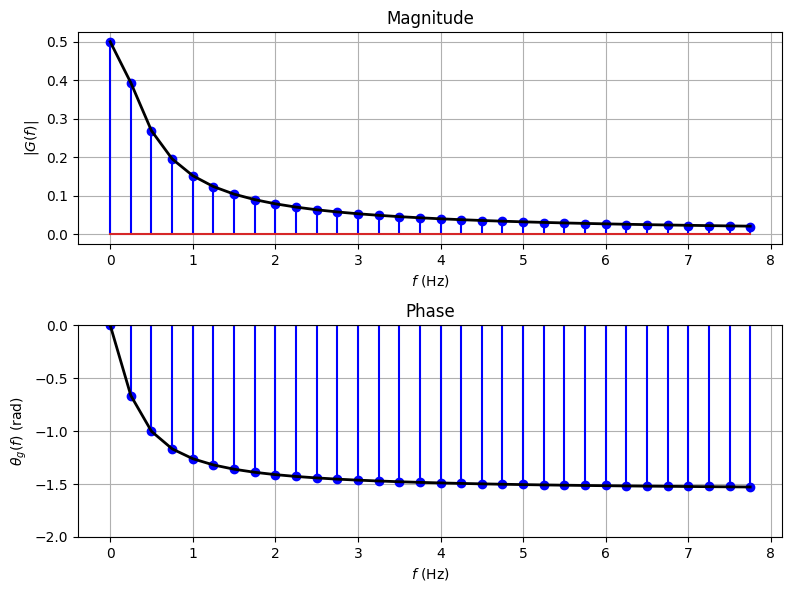

In [3]:
# Save this program as EXChapter3_1.py
import numpy as np
import matplotlib.pyplot as plt
# pick any parameter q > 0 to generate a signal exp(-qt)u(t)
q = 2
# select parameters T0, Ts, and N
Ts = 1/64;  T0 = 4
N0 = int(T0 / Ts)  			# fix N0 sampling points in T0
t = np.arange(N0) * Ts 		# obtain the time-sampled signals
g = Ts * np.exp(-q * t)
g[0] = Ts * 0.5 				# fix the t=0 sample value
Gnum = np.fft.fft(g)			# use numerical FFT to find G(f)
# computing magnitude/phase of DFT:
Gp, Gm = np.angle(Gnum), np.abs(Gnum)
# take N0 uniform samples in frequency:
k = np.arange(N0);		fvec = k / (N0 * Ts)

# compute theoretical G(f) as benchmark to numerical computation
Gthy = 1 / (q + 1j * 2 * np.pi * fvec)

# compare the analytical results of Fourier Transform
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
axs[0].stem(fvec[:32], Gm[:32], linefmt='b')
axs[0].plot(fvec[:32], np.abs(Gthy)[:32], 'k-', linewidth=2)
axs[0].set_title('Magnitude');  axs[0].grid(True)
axs[0].set_xlabel(r'$f$ (Hz)')
axs[0].set_ylabel(r'$|G(f)|$')
axs[1].stem(fvec[:32], Gp[:32], linefmt='b')
axs[1].plot(fvec[:32], np.angle(Gthy)[:32], 'k-', linewidth=2)
axs[1].set_title('Phase');      axs[1].grid(True)
axs[1].set_xlabel(r'$f$ (Hz)')
axs[1].set_ylabel(r'$\theta_g(f)$ (rad)')
axs[1].set_ylim([-2,0])
# Set the spacing between subfigures
fig.tight_layout(pad=1.0)
plt.show()

<img src="images/Fig3_45.png" width="600" />

<center><b>Figure 3.45</b> Discrete Fourier transform of the signal $ g(t) = e^{−2t}u(t) $.</center>
<span style="color:red"> <b>*Note: See Text. *</b></span>

Next, we compute the Fourier transform of $ g(t) = 8\Pi(t/\tau)$.

## COMPUTER EXAMPLE C3.2
<span style="color:red"> <b>*Note: See Text. *</b></span>

We first recall the implementation of the basic function when a time vector $t$ is defined:
* rect: implements the standard rectangular function $rect(t)$

In [4]:
# The rectangular function is a function of time ‘t’.
# Usage y = rect(t)
# t - must be real-valued and can be a vector or a matrix
#
# rect(t) = 1, if |t| < 0.5
# rect(t) = 0, if |t| > 0.5
def rect(t):
    y = np.array((np.sign(t+0.5)-np.sign(t-0.5)) > 0, dtype=float)
    return y

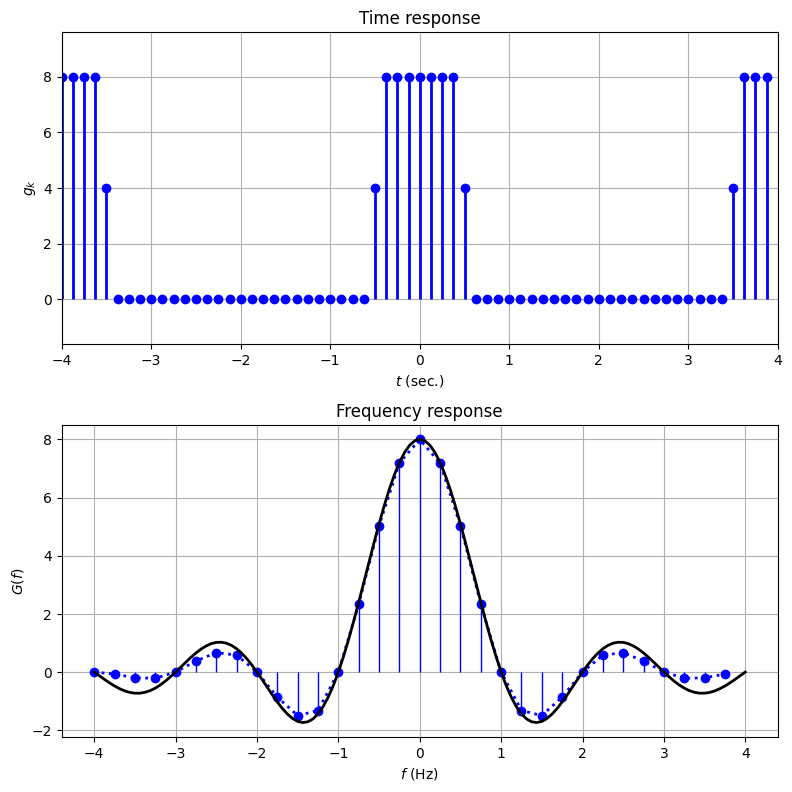

In [5]:
# Save this program as EXChapter3_2.py
import numpy as np
import matplotlib.pyplot as plt

tau = 1;  B = 4/tau # Set tau. Approximate bandwidth=B=4/tau Hz
Ts = 1/(2*B)        # Sampling rate = 2B per Nyquist rate
T0 = 4*tau          # Consider the signal rect(t/tau) for T0 second
N0 = int(T0/Ts)     # Number of samples in time domain

k = np.arange(N0);  gtd = np.zeros(N0)  # Set time index k and g(t) in tim
A = 8               # Amplitude of the rectangular pulse
fsamp = np.linspace(-B, B, 4*N0+1)  # select analytic samples in frequency
Gf = A*tau*np.sinc(tau*fsamp)   # Python numpy.sinc uses sinc(x)=sin(pi x)/(pi x)
Tmid = int(np.ceil(N0/2))       # Midpoint in FFT
gtd[:Tmid] = A*rect(np.arange(1,Tmid+1)*Ts/tau)  # sample g(t) from 0 to Tmid
tedge = int(np.round(tau/(2*Ts)))  # Find discontinuity position = tedge

# If tedge is a sampling point,
if abs(tau-tedge*2*Ts) < 1.e-13:
    gtd[tedge] = A/2        # Then take the mid value between 0 & A

gtd[N0-1:N0-Tmid:-1] = gtd[1:Tmid]  # Form one period of rect(t/tau)
tvec = k*Ts                         # scale time sampling instants in seconds
Gq = np.real(np.fft.fftshift(np.fft.fft(Ts*gtd))) # FFT and shift to center
fvec = k/(N0*Ts)-B                  # Scaling the frequency range of FFT

fig, axs = plt.subplots(2, 1, figsize=(8, 8))       # plot 2 periods
figtd1 = axs[0].stem(np.concatenate((tvec-T0, tvec)),
                np.concatenate((gtd, gtd)),
                    linefmt='b-', markerfmt='bo', basefmt=' ')
axs[0].axis([-4, 4, -0.2*A, A*1.2])
axs[0].set_xlabel(r'$t$ (sec.)');   axs[0].set_ylabel(r'$g_k$')
axs[0].set_title('Time response'); axs[0].grid()
# use stem for FFT
figfd1 = axs[1].stem(fvec, Gq, linefmt='b-', markerfmt='bo', basefmt=' ')
figfd2 = axs[1].plot(fvec, Gq, 'b:')
axs[1].set_xlabel(r'$f$ (Hz)');     axs[1].set_ylabel(r'$G(f)$')
axs[1].set_title('Frequency response');   axs[1].grid()
# Plot analytical Fourier Transform on top of numerical values
figfd3 = axs[1].plot(fsamp, Gf, 'k')
plt.setp(figtd1, linewidth=2);  plt.setp(figfd1, linewidth=1)
plt.setp(figfd2, linewidth=2);  plt.setp(figfd3, linewidth=2)

# Set the spacing between subfigures
fig.tight_layout(pad=1.0)
plt.show()

<img src="images/Fig3_46.png" width="600" />

<center><b>Figure 3.46</b> Discrete Fourier transform of a rectangular pulse.</center>

<span style="color:red"> <b>*Note: See Text. *</b></span>

# 3.10.2 Illustration of Time-Shifting Property
We now use the next example to illustrate the time-shifting property of Fourier Transform. Both the closed analytical form and the FFT results shall be compared in this example.

## COMPUTER EXAMPLE C3.3
<span style="color:red"> <b>*Note: See Text. *</b></span>

In [6]:
# The triangular function is a function of time ‘t’.
# Usage y = triangl(t)
# t - must be real-valued and can be a vector or a matrix
#
# triangl(t) = (1 - |t|), if |t| < 1
# triangl(t) = 0, if |t| >= 1
def triangl(t):
    y = np.array((1 - np.abs(t)) * ((t >= -1) & (t < 1)), dtype=float)
    return y

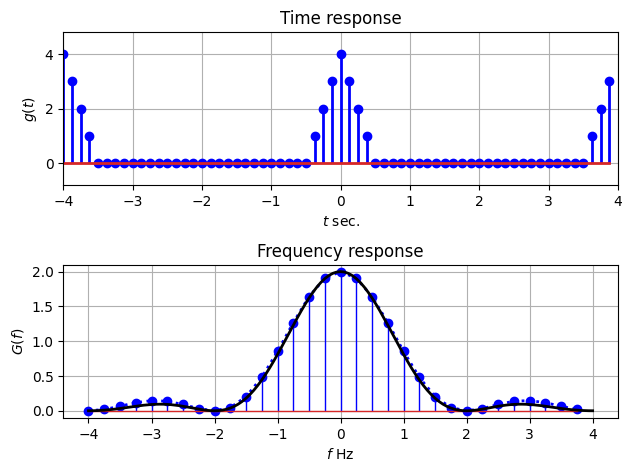

In [7]:
# Save this program aS EXChaper3_3.py
# This exercise computes the Fourier transform of  A * Delta(t/tau) using FFT
# and compare the result against the exact value of tau/2 *sinc^2( pi f tau/2)
plt.clf();plt.cla(); plt.close('all')
tau = 1;  B = 4 / tau   # Approximate bandwidth=B=4/tau Hz.
Ts = 1 / (2 * B)        # Sampling rate = 2B per Nyquist rate
T0 = 4 * tau            # Consider A Delta(t/tau) for T0 seconds
N0 = int(T0/Ts)       # Number of samples in time domain
k = np.arange(N0)       # Set time index k
gtd = np.zeros(N0)      # Initialize g(t) in time
A = 4                   # Amplitude of the triangular pulse
fsamp = np.arange(4*N0+1)/(4*N0*Ts)-B # Select analytical samples in frequency
# Calculate Fourier transform analytically
Gf = A * tau * np.sinc(tau * fsamp / 2)**2/2  # Python sinc(x)=sin(pi x)/(pi x)
Tmid = int(np.ceil(N0 / 2))                   # Midpoint in FFT
gtd[:Tmid+1] = A*triangl(2*np.arange(0,Tmid+1)*Ts/tau)  # g(t) from 0 to Tmid
gtd[N0-1:N0-Tmid-1:-1] = gtd[1:Tmid+1] # Form periodic Delta(t/tau)
tvec = k * Ts                                 # Time sampling instants
Gq = np.fft.fftshift(np.fft.fft(Ts * gtd))    # FFT and shift to center
Gm, Gp = np.abs(Gq), np.angle(Gq)             # Find magnitude/phase
fvec = k/(N0 * Ts) - B                        # Set the frequency range of FFT

plt.figure()        # Start to plot results
plt.subplot(211)
figtd1 = plt.stem(np.concatenate([tvec - T0, tvec]),
            np.concatenate([gtd, gtd]),
            linefmt='b-', markerfmt='bo') # 2 periods
plt.axis([-4, 4, -0.2 * A, A + 0.2 * A])
# title and label
plt.title('Time response');     plt.grid()
plt.xlabel(r'${\it{t}}$ sec.'); plt.ylabel(r'${\it{g}}({\it{t}})$')
plt.tick_params(labelsize=10)

ax = plt.subplot(212)
figfd1 = plt.stem(fvec, Gm, linefmt='b-', markerfmt='bo') # Stem magnitude
figfd2 = plt.plot(fvec, Gm, 'b:') # replot magnitude
figfd3 = plt.plot(fsamp, Gf, 'k') # Analytic Fourier Transform
# title + label
plt.title('Frequency response');  plt.grid()
plt.xlabel(r'${\it{f}}$ Hz');   plt.ylabel(r'${\it{G}}( {\it{f}})$')
plt.tick_params(labelsize=10)

# set width
plt.setp(figtd1, linewidth=2);  plt.setp(figfd1, linewidth=1)
plt.setp(figfd2, linewidth=2);  plt.setp(figfd3, linewidth=2)

# Set the spacing between subfigures
plt.tight_layout(pad=1.0);    plt.show()

<img src="images/Fig3_47.png" width="600" />

<center><b>Figure 3.47</b> Discrete Fourier transform of a triangular pulse. </center>

<span style="color:red"> <b>*Note: See Text. *</b></span>

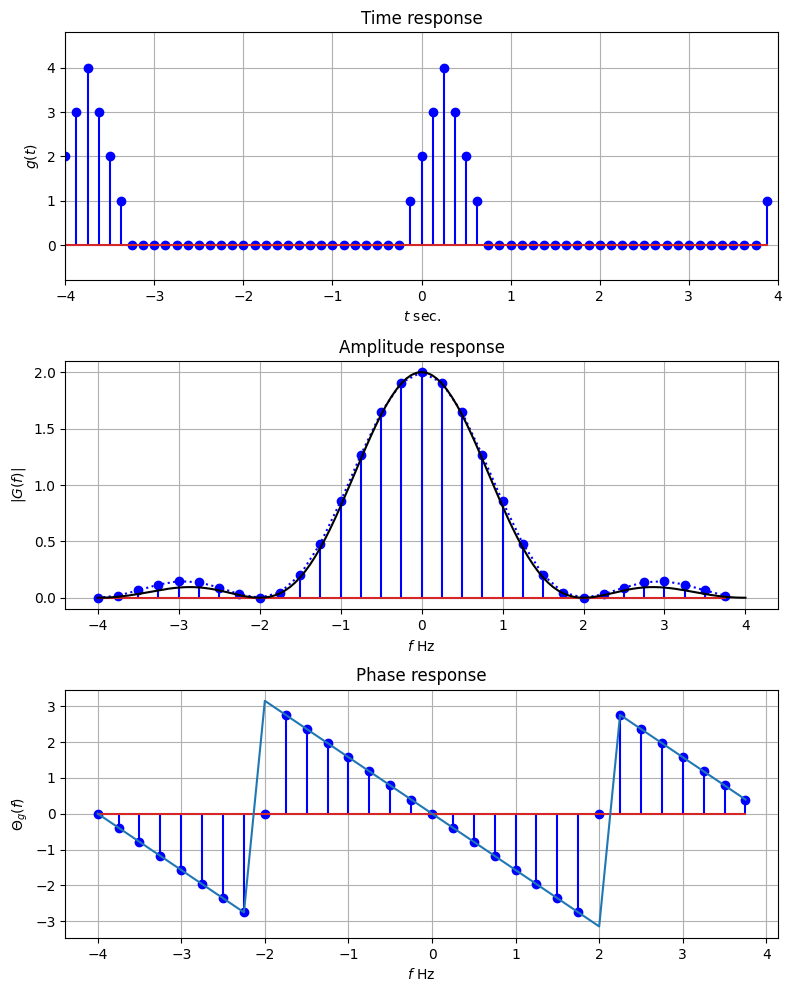

In [8]:
# Now show the time delay effect in figures
plt.figure(2, figsize=(8, 10))  # Plot the Fourier Transform of g(t-t0)
gtdlay = np.roll(gtd, 2) # time delay be 2 samples

Gq = np.fft.fftshift(np.fft.fft(Ts * gtdlay)) # FFT and shift to center
Gm, Gp = np.abs(Gq), np.angle(Gq)             # Magnitude/phase
fvec=k / (N0 * Ts) - B          # Scaling the frequency range of FFT

Gfdlay = np.exp(-1j * 2 * np.pi * fvec * 2 * Ts)  # Theoretical delay effect

plt.subplot(311)
figtd2_1 = plt.stem(np.concatenate([tvec-T0,tvec]), np.concatenate([gtdlay, gtdlay]),'b')
plt.axis([-4, 4, -0.2 * A, 1.2 * A])
plt.title('Time response');     plt.grid()
plt.xlabel('${\it{t}}$ sec.');  plt.ylabel('${\it{g}}({\it{t}})$')

ax = plt.subplot(312)
figfd2_1 = plt.stem(fvec, Gm, linefmt='b')
figfd2_2 = plt.plot(fvec, Gm, 'b:')
figfd2_3 = plt.plot(fsamp, Gf, 'k') # Analytical values
plt.title('Amplitude response');  plt.grid()
plt.xlabel('${\it{f}}$ Hz');    plt.ylabel('$|{\it{G}}( {\it{f}})|$')

ax = plt.subplot(313)
figfdp1 = plt.stem(fvec, Gp, linefmt='b')
figfdp2 = plt.plot(fvec, np.angle(Gfdlay))
plt.title('Phase response');    plt.grid()
plt.xlabel('${\it{f}}$ Hz');    plt.ylabel('$\Theta_{\it{g}}( {\it{f}})$')

plt.tick_params(labelsize=10)
plt.setp(figtd1, linewidth=2);  plt.setp(figfd1, linewidth=1)
plt.setp(figfd2, linewidth=2);  plt.setp(figfd3, linewidth=2)

# Set the spacing between subfigures before showing
plt.tight_layout(pad=1.0); plt.show()

<img src="images/Fig3_48.png" width="600" />

<center><b>Figure 3.48</b> Fourier transform of a delayed triangle pulse $\delta(t−2T_s)$. </center>

# 3.10.3 Filtering
## COMPUTER EXAMPLE C3.4
<span style="color:red"> <b>*Note: See Text. *</b></span>

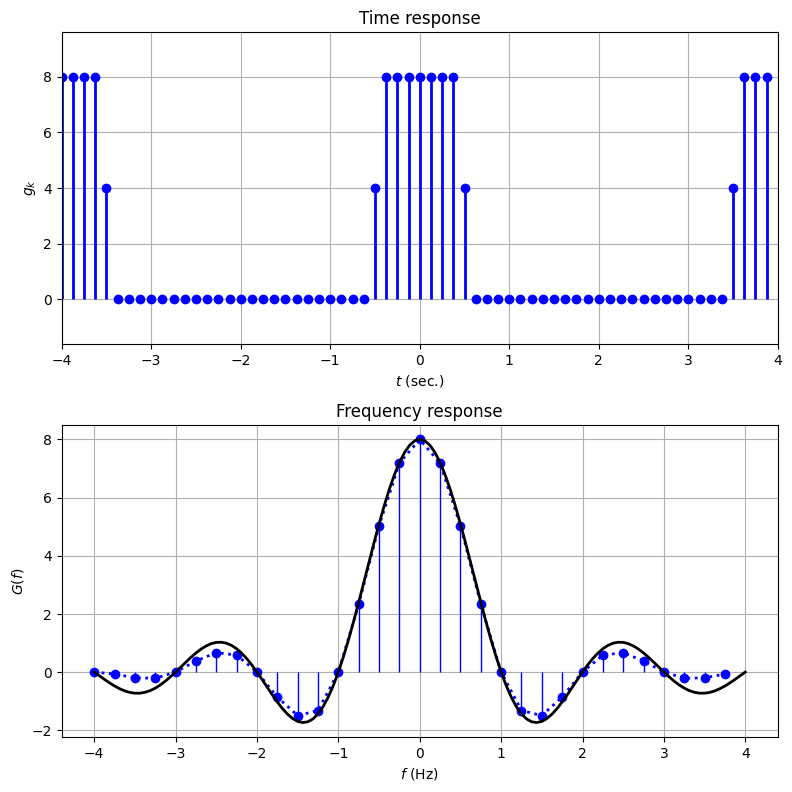

In [9]:
# Save this program as EXChapter3_2.py
import numpy as np
import matplotlib.pyplot as plt

tau = 1;  B = 4/tau # Set tau. Approximate bandwidth=B=4/tau Hz
Ts = 1/(2*B)        # Sampling rate = 2B per Nyquist rate
T0 = 4*tau          # Consider the signal rect(t/tau) for T0 second
N0 = int(T0/Ts)     # Number of samples in time domain

k = np.arange(N0);  gtd = np.zeros(N0)  # Set time index k and g(t) in tim
A = 8               # Amplitude of the rectangular pulse
fsamp = np.linspace(-B, B, 4*N0+1)  # select analytic samples in frequency
Gf = A*tau*np.sinc(tau*fsamp)   # Python numpy.sinc uses sinc(x)=sin(pi x)/(pi x)
Tmid = int(np.ceil(N0/2))       # Midpoint in FFT
gtd[:Tmid] = A*rect(np.arange(1,Tmid+1)*Ts/tau)  # sample g(t) from 0 to Tmid
tedge = int(np.round(tau/(2*Ts)))  # Find discontinuity position = tedge

# If tedge is a sampling point,
if abs(tau-tedge*2*Ts) < 1.e-13:
    gtd[tedge] = A/2        # Then take the mid value between 0 & A

gtd[N0-1:N0-Tmid:-1] = gtd[1:Tmid]  # Form one period of rect(t/tau)
tvec = k*Ts                         # scale time sampling instants in seconds
Gq = np.real(np.fft.fftshift(np.fft.fft(Ts*gtd))) # FFT and shift to center
fvec = k/(N0*Ts)-B                  # Scaling the frequency range of FFT

fig, axs = plt.subplots(2, 1, figsize=(8, 8))       # plot 2 periods
figtd1 = axs[0].stem(np.concatenate((tvec-T0, tvec)),
                np.concatenate((gtd, gtd)),
                    linefmt='b-', markerfmt='bo', basefmt=' ')
axs[0].axis([-4, 4, -0.2*A, A*1.2])
axs[0].set_xlabel(r'$t$ (sec.)');   axs[0].set_ylabel(r'$g_k$')
axs[0].set_title('Time response'); axs[0].grid()
# use stem for FFT
figfd1 = axs[1].stem(fvec, Gq, linefmt='b-', markerfmt='bo', basefmt=' ')
figfd2 = axs[1].plot(fvec, Gq, 'b:')
axs[1].set_xlabel(r'$f$ (Hz)');     axs[1].set_ylabel(r'$G(f)$')
axs[1].set_title('Frequency response');   axs[1].grid()
# Plot analytical Fourier Transform on top of numerical values
figfd3 = axs[1].plot(fsamp, Gf, 'k')
plt.setp(figtd1, linewidth=2);  plt.setp(figfd1, linewidth=1)
plt.setp(figfd2, linewidth=2);  plt.setp(figfd3, linewidth=2)

# Set the spacing between subfigures
fig.tight_layout(pad=1.0); plt.show()

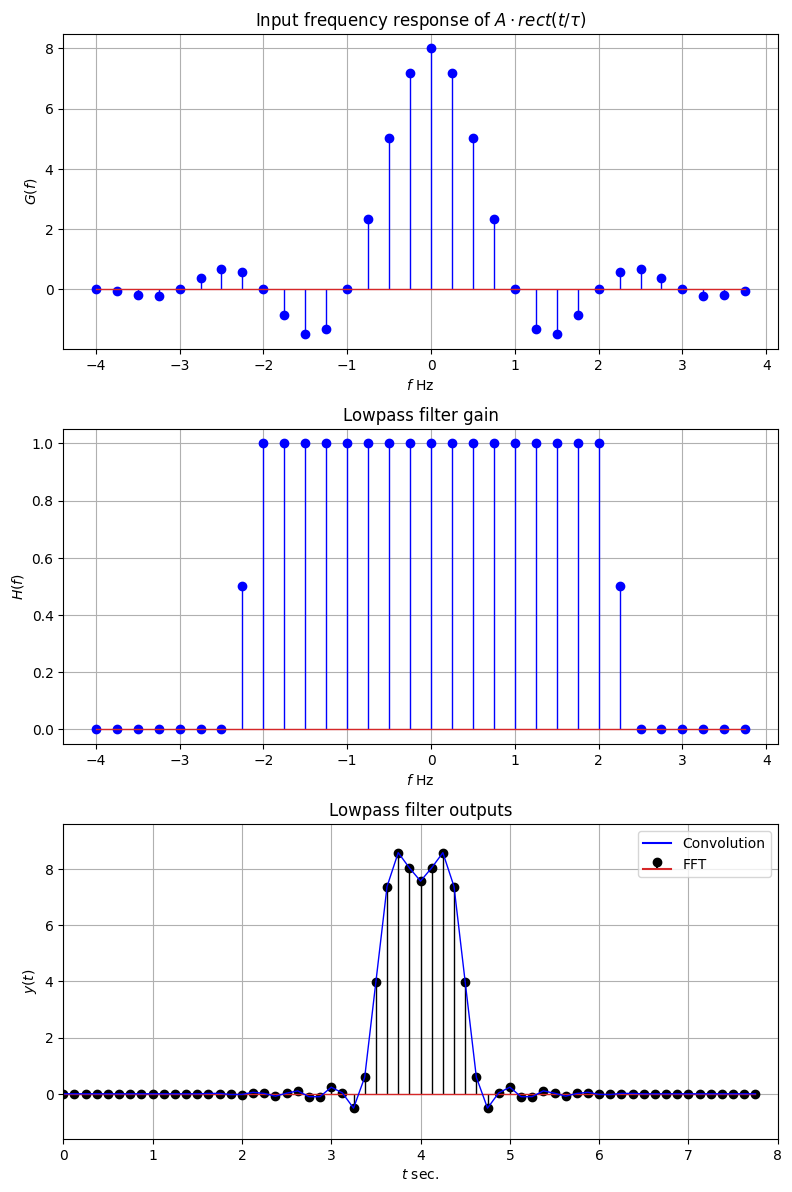

In [10]:
# Save this program as EXChapter3_4.py
# This exercise filters rectangular signal g(t)= 8 * rect(t/tau) using (a) FFT
# and compare the result against (b) time-domain convolution result
# Method (a) is offline whereas method (b) is online.
# Method (a) is ideal whereas method (b) is near-perfect lowpass

q = np.arange(N0)                 # Set index for frequency
Tmid = np.ceil(N0/2).astype(int)  # midpoint of FFT
fcutoff = 2/tau                   # lowpass filter cutoff freq. =< B=4/tau Hz
fs = 1/(N0 * Ts)                  # FFT sampling resolution
qcutoff = np.ceil(fcutoff/fs).astype(int) # locate discontinuity point
Hq = np.zeros(N0)                         # initialize all frequency gain to 0
Hq[:qcutoff+1] = 1                        # Passband of lowpass filter
Hq[qcutoff+1] = 0.5                       # cutoff frequency gain = 0.5
Hq[N0-1:N0-Tmid+1:-1] = Hq[1:Tmid-1]      # Form periodic rect(t/tau)
Yq = Gq * np.fft.fftshift(Hq)             # frequency domain filtering
yk = np.fft.ifft(np.fft.fftshift(Yq))/Ts  # LPF filter output; remove Ts in Gq

gtshift = np.fft.fftshift(gtd)            # shift g(t) to causal
hk = np.fft.fftshift(np.fft.ifft(Hq))     # causal filter impulse response
ykconv = np.convolve(gtshift, hk)         # use convolution to filter
ykpad = np.concatenate([np.zeros(N0//2),np.fft.fftshift(yk),np.zeros(N0//2-1)]) # match length

plt.figure(figsize=(8,12))
plt.subplot(311);  plt.grid()
figfd1 = plt.stem(fvec,Gq, linefmt='b') # Gq of rect(t/tau)
plt.title(r'Input frequency response of $A \cdot rect(t / \tau )$')
plt.xlabel('${\it{f}}$ Hz');    plt.ylabel('${\it{G}}( {\it{f}})$')

plt.subplot(312); plt.grid()
figfd2 = plt.stem(fvec, np.fft.fftshift(Hq), linefmt='b') # ideal LPF H(f)
plt.title('Lowpass filter gain')
plt.xlabel('${\it{f}}$ Hz');    plt.ylabel('${\it{H}}( {\it{f}})$')

ax = plt.subplot(313);  plt.grid()
figtd1 = plt.stem(np.arange(2 * N0 - 1)*Ts, np.real(ykpad),'k', label='FFT') # LPF output
figtd2 = plt.plot(np.arange(2 * N0 - 1)*Ts, np.real(ykconv), 'b', label='Convolution')
plt.title('Lowpass filter outputs')
plt.xlabel('${\it{t}}$ sec.');  plt.ylabel('${\it{y}}({\it{t}})$')
plt.axis([0, 8, -0.2 * A, 1.2 * A]);    plt.legend()

#plt.tick_params(labelsize=10)
plt.setp(figtd1, linewidth=1); plt.setp(figtd2, linewidth=1)
plt.setp(figfd1, linewidth=1); plt.setp(figfd2, linewidth=1)

# Set the spacing between subfigures
plt.tight_layout(pad=1.0); plt.show()

<img src="images/Fig3_49.png" width="600" />

<center><b>Figure 3.49</b> Lowpass filtering of a rectangular pulse.</center>

# 3.10.4 Autocorrelation Function and PSD

<span style="color:red"> <b>*Note: See Text. *</b></span>

## COMPUTER EXAMPLE C3.5

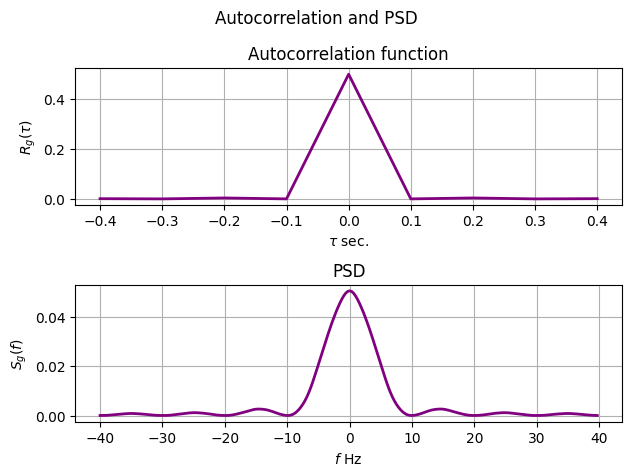

In [11]:
# Save this code as EXChapter3_5.py
# (1) generates the binary transmission in Example 3.23;
# (2) computes the autocorrelation function;
# (3) uses FFT to determine the Power Spectral Density

tau = 0.1; B = 4 / tau    # Set tau and approximate bandwidth=B=8/tau Hz.
Ts = 1 / (2 * B)          # Sampling rate = 2B per Nyquist rate
tduty = 0.5               # pulse duty cycle
Tb = tau / tduty          # Consider the RZ duty cycle of the pulse
Np = int(Tb / Ts)         # Number of samples in each pulse
Nfft = 256                # Set Power spectrum resolution in frequency
k = np.arange(Np)         # form time index k
puls = np.zeros(Np)       # g(t) in time
A = 1                     # Amplitude of the pulse
Tp = tau / Ts             # pulse width in points
puls[:Np] = A * rect(np.arange(1,Np+1)*Ts/tau-0.5) # sample g(t) from 0 to Tb

# Generate a random binary data -1 and +1 of length Na
Na = 20000 # Select the data length
a = 2 * np.random.randint(2, size=(Na,)) - 1 # data -1,+1 equally distributed
# Baseband modulation
# s = np.repeat(a, Np)     # Np samples per data symbol a_k
s = np.stack([a] +[a*0] * (Np-1),axis=-1).reshape(-1)
gt = np.convolve(s, puls, mode='full')      # Baseband transmitted signal

lagcorrfunc = 2           # Maximum lag in units of Np for auto-correlation
lagsamp = lagcorrfunc * Np
# computes cross-correlation while limiting lag range from -lagsamp to lagsamp
rgtau = np.correlate(gt,gt,'full')[len(gt)-1-lagsamp:len(gt)+lagsamp] / len(gt)
tauvec = np.arange(-lagsamp, lagsamp+1) * Ts
rgpad = np.concatenate((rgtau,np.zeros(Nfft-len(rgtau)))) #pad 0s for resolution

rgshift = np.roll(rgpad, -lagsamp) # shift for FFT
PowerSD = np.fft.fft(rgshift) * Ts # Use FFT for Power Spectrum Density
fvec = np.arange(Nfft) / (Ts * Nfft) - B # Find the frequency range

fig, axs = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Autocorrelation and PSD')
figcor = axs[0].plot(tauvec, rgtau,'purple')
axs[0].set_title('Autocorrelation function');   axs[0].grid(True)
axs[0].set_xlabel(r'$ \tau $ sec.');
axs[0].set_ylabel(r'$ R_{\it{g}}( \tau ) $')

figpsd = axs[1].plot(fvec, np.fft.fftshift(np.real(PowerSD)),'purple')
axs[1].set_title('PSD');  axs[1].grid(True)
axs[1].set_xlabel('${\it{f}}$ Hz')
axs[1].set_ylabel('${\it{S}}_{\it{g}}({\it{f}})$')

plt.tick_params(labelsize=10)
plt.setp(figcor, linewidth=2);  plt.setp(figpsd, linewidth=2)
plt.tight_layout(pad=1.0); plt.show()

<img src="images/Fig3_50.png" width="600" />

<center><b>Figure 3.50</b> Lowpass filtering of a rectangular pulse.</center>